<a href="https://colab.research.google.com/github/leonardo-toffalini/szgepes25-hf/blob/main/szgepes_hf_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat
Azt szeretnénk vizsgálni, hogy a napi középhőmérséklet október 28-án Budapesten 15 C fok alatt volt-e? Az elmúlt 4 év napi középhőmérsékletei a következők voltak: x=c(14.8,12.2,16.8,11.1). Tegyük fel, hogy az adatok normális eloszlásból származnak és, hogy a szórás ismeretlen (múlt órai 2/c feladat). Ha lenne lehetőségünk egy tetszőleges ötödik adatot beírni úgy, hogy a próbánk p-értéke minél kisebb legyen, akkor mit válasszunk? Adjunk indoklást is!

In [47]:
x = c(14.8, 12.2, 16.8, 11.1)
cat("kozephomerseklet kisebb mint 15 C -- p =", t.test(x, mu=15, alternative="l")$p.value, "\n")

kozephomerseklet kisebb mint 15 C -- p = 0.1971831 


Mi legyen az otodik ertek?

Nincs kedvem szamolni ezert inkabb empirikusan nezzuk meg

In [45]:
fifth_vals = seq(-20, 20, by=0.001)
p_vals = lapply(fifth_vals, function(fifth) {
  x = c(14.8, 12.2, 16.8, 11.1, fifth)
  return(t.test(x, mu=15, alternative="l")$p.value)
})

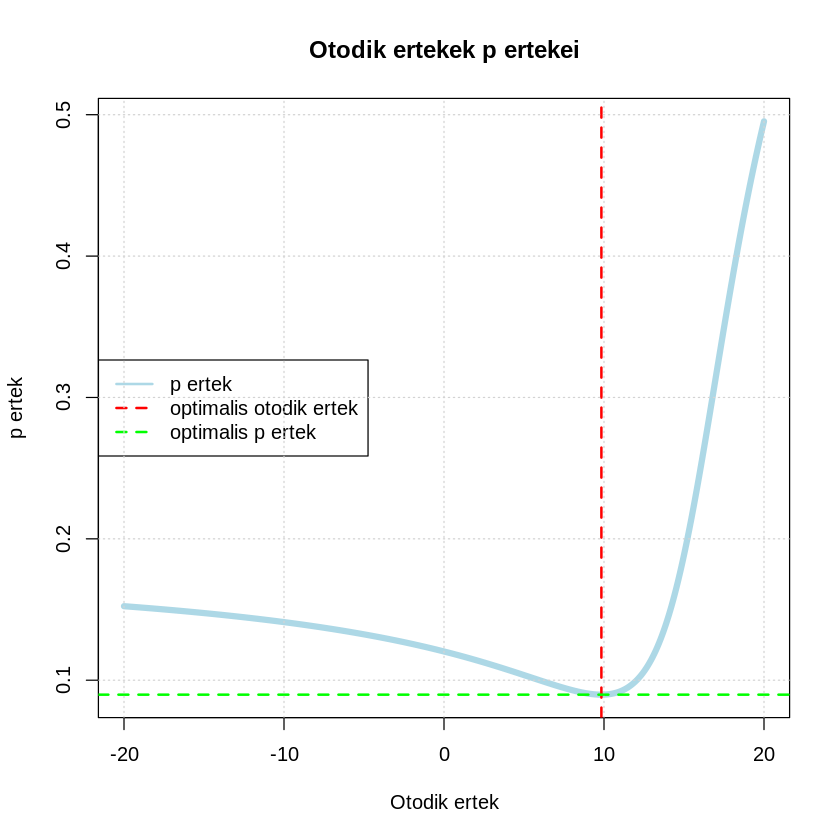

In [58]:
optimal_fifth = fifth_vals[which.min(p_vals)]
optimal_p_val = min(unlist(p_vals))

plot(
  fifth_vals,
  p_vals,
  type="l",
  lwd=5,
  col="lightblue",
  xlab="Otodik ertek",
  ylab="p ertek",
  main="Otodik ertekek p ertekei"
)

abline(v=optimal_fifth, col="red", lty=2, lwd=2)
abline(h=optimal_p_val, col="green", lty=2, lwd=2)

legend("left",
  legend=c("p ertek", "optimalis otodik ertek", "optimalis p ertek"),
  col=c("lightblue", "red", "green"),
  lty=c(1, 2, 2),
  lwd=c(2, 2, 2)
)
grid()

In [43]:
cat("Optimalis otodik ertek:", optimal_fifth, "C \n")
cat("Optimalis p ertek:     ", optimal_p_val, "\n")

Optimalis otodik ertek: 9.837 C 
Optimalis p ertek:      0.08977171 


Tehat a valasz $\approx 9.837$.

Ha analitikusan ki akarnank szamolni akkor fel kene irni a p erteket az otodik ertek fuggvenyeben es annak a fuggvenynek megkeresni a minimum helyet.